# Train DeBCR tutorial

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import glob
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from util.utils import *
from configs.yaml_loader import *
import argparse

## Config

In [2]:
# define config (yaml) path

config_path = 'configs/LM_2D_denoising.yaml'

config = get_config(config_path)

In [3]:
# set GPU ID to use
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [5]:
!pwd

/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR/develop


## Data

In [4]:
# define the data path 
from natsort import natsorted

#DATA_PATH = "/full/path/to/data/2D_denoising/"  # use the absolute path!
DATA_PATH = "/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR/data_2D_denoising/data-zenodo/"

# training
train_data_dir = DATA_PATH + 'train/'
train_data_list = natsorted(os.listdir(train_data_dir))

# validate
val_data_dir = DATA_PATH + 'val/'
val_data_list = natsorted(os.listdir(val_data_dir))  

In [5]:
# call for the data generator

# tranining
train_gen_class = DataGenerator(train_data_dir, train_data_list,config.data['train_batch'], config.data['noise'])
train_img_datagen = train_gen_class.imageLoader()

# validate
val_gen_class = DataGenerator(val_data_dir, val_data_list, config.data['val_batch'], config.data['noise'])
val_img_datagen = val_gen_class.imageLoader()

Loading dataset: LM_2D_CARE_train.npz
(32, 128, 128, 1)


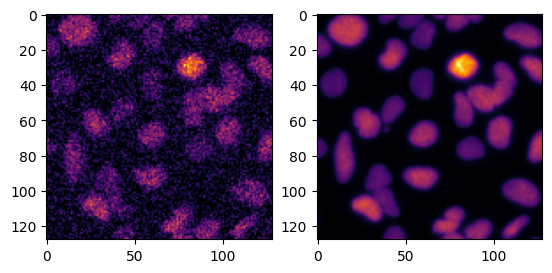

18


In [6]:
# sanity check

w_img_temp, o_temp = train_img_datagen.__next__()
print(w_img_temp.shape)

slice_num = random.randint(0, w_img_temp.shape[0]-1)
subShow(w_img_temp[slice_num].squeeze(), o_temp[slice_num].squeeze())
print(slice_num)

Loading dataset: LM_2D_CARE_val.npz
(16, 128, 128, 1)


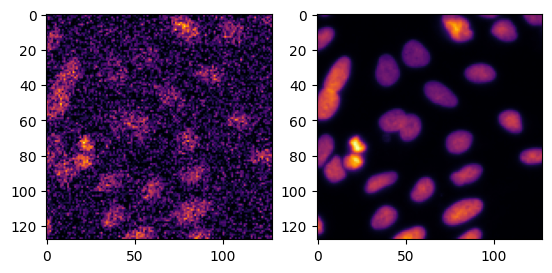

7


In [7]:
# sanity check

w_img_temp, o_temp = val_img_datagen.__next__()
print(w_img_temp.shape)

slice_num = random.randint(0, w_img_temp.shape[0]-1)
subShow(w_img_temp[slice_num].squeeze(), o_temp[slice_num].squeeze())
print(slice_num)

# Model

In [8]:
from models.DeBCR import *
from util.loss_func import *
from util.metrics import *

model = model_DeBCR()
model.compile(optimizer=config.training['opti'], loss=loss_function_mimo, metrics=[metrics_func_mimo])
print(model.input_shape, model.output_shape) # [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] 
print(model.summary())

[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x0_input (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 x2_input (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 x4_input (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                       

# Train

0 tf.Tensor(1.0389198, shape=(), dtype=float32) tf.Tensor(15.340605, shape=(), dtype=float32)
Validation best loss: 0 tf.Tensor(1.115878, shape=(), dtype=float32) tf.Tensor(14.9087715, shape=(), dtype=float32)
Objects: 3


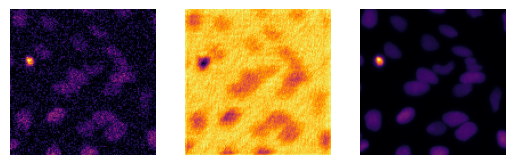

50 tf.Tensor(0.5537009, shape=(), dtype=float32) tf.Tensor(24.589354, shape=(), dtype=float32)
100 tf.Tensor(0.48963365, shape=(), dtype=float32) tf.Tensor(24.974295, shape=(), dtype=float32)
Validation best loss: 100 tf.Tensor(0.5544385, shape=(), dtype=float32) tf.Tensor(24.210592, shape=(), dtype=float32)
Objects: 14


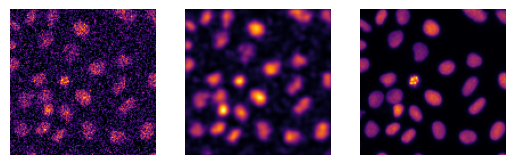

150 tf.Tensor(0.47551262, shape=(), dtype=float32) tf.Tensor(25.978975, shape=(), dtype=float32)
200 tf.Tensor(0.42221782, shape=(), dtype=float32) tf.Tensor(26.708792, shape=(), dtype=float32)
Validation best loss: 200 tf.Tensor(0.4678956, shape=(), dtype=float32) tf.Tensor(26.853334, shape=(), dtype=float32)
Objects: 22


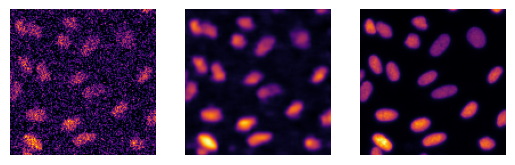

250 tf.Tensor(0.4696827, shape=(), dtype=float32) tf.Tensor(25.308416, shape=(), dtype=float32)
300 tf.Tensor(0.4365055, shape=(), dtype=float32) tf.Tensor(27.507496, shape=(), dtype=float32)
Validation best loss: 300 tf.Tensor(0.40156025, shape=(), dtype=float32) tf.Tensor(27.335655, shape=(), dtype=float32)
Objects: 10


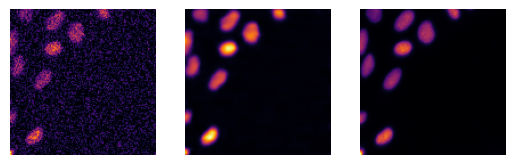

350 tf.Tensor(0.44103014, shape=(), dtype=float32) tf.Tensor(27.083326, shape=(), dtype=float32)
400 tf.Tensor(0.3928604, shape=(), dtype=float32) tf.Tensor(28.12592, shape=(), dtype=float32)
Objects: 31


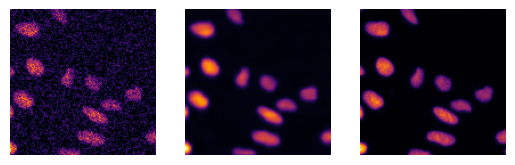

450 tf.Tensor(0.4973273, shape=(), dtype=float32) tf.Tensor(26.06432, shape=(), dtype=float32)
500 tf.Tensor(0.48570848, shape=(), dtype=float32) tf.Tensor(25.763596, shape=(), dtype=float32)
Validation best loss: 500 tf.Tensor(0.39946368, shape=(), dtype=float32) tf.Tensor(28.261095, shape=(), dtype=float32)
Objects: 5


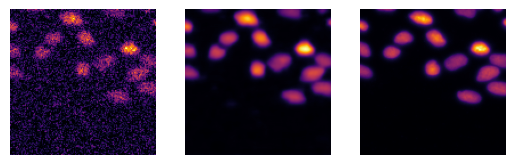

550 tf.Tensor(0.4599464, shape=(), dtype=float32) tf.Tensor(26.130598, shape=(), dtype=float32)
600 tf.Tensor(0.44834232, shape=(), dtype=float32) tf.Tensor(26.086721, shape=(), dtype=float32)
Objects: 2


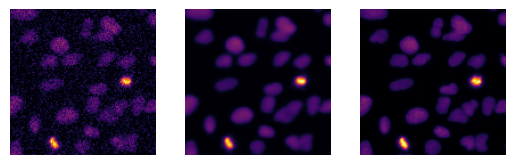

650 tf.Tensor(0.40098107, shape=(), dtype=float32) tf.Tensor(26.788944, shape=(), dtype=float32)
700 tf.Tensor(0.4628083, shape=(), dtype=float32) tf.Tensor(26.046982, shape=(), dtype=float32)
Objects: 16


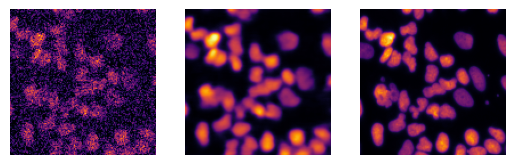

750 tf.Tensor(0.38171327, shape=(), dtype=float32) tf.Tensor(28.90313, shape=(), dtype=float32)
800 tf.Tensor(0.42791405, shape=(), dtype=float32) tf.Tensor(27.263737, shape=(), dtype=float32)
Objects: 16


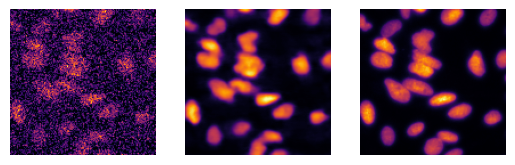

850 tf.Tensor(0.38375396, shape=(), dtype=float32) tf.Tensor(29.009428, shape=(), dtype=float32)
900 tf.Tensor(0.41724107, shape=(), dtype=float32) tf.Tensor(25.727812, shape=(), dtype=float32)
Validation best loss: 900 tf.Tensor(0.3748957, shape=(), dtype=float32) tf.Tensor(28.724514, shape=(), dtype=float32)
Objects: 9


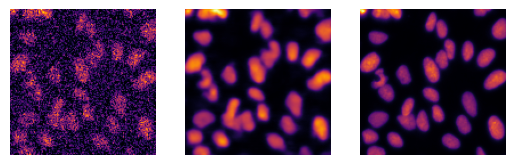

950 tf.Tensor(0.43104786, shape=(), dtype=float32) tf.Tensor(26.44056, shape=(), dtype=float32)
1000 tf.Tensor(0.36419842, shape=(), dtype=float32) tf.Tensor(29.27979, shape=(), dtype=float32)
Objects: 5


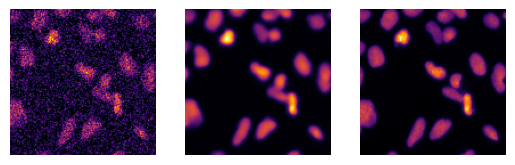

1050 tf.Tensor(0.41943613, shape=(), dtype=float32) tf.Tensor(27.180237, shape=(), dtype=float32)
1100 tf.Tensor(0.41586423, shape=(), dtype=float32) tf.Tensor(27.475458, shape=(), dtype=float32)
Objects: 14


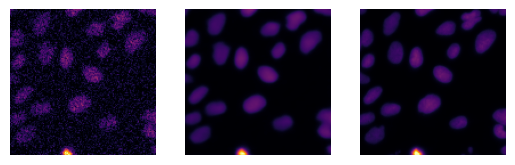

1150 tf.Tensor(0.40924016, shape=(), dtype=float32) tf.Tensor(27.000309, shape=(), dtype=float32)
1200 tf.Tensor(0.33516097, shape=(), dtype=float32) tf.Tensor(28.872816, shape=(), dtype=float32)
Validation best loss: 1200 tf.Tensor(0.37026894, shape=(), dtype=float32) tf.Tensor(29.524271, shape=(), dtype=float32)
Objects: 7


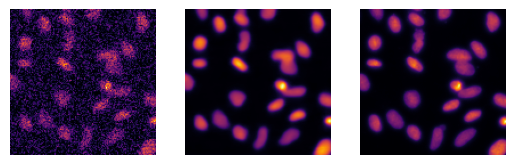

1250 tf.Tensor(0.36263484, shape=(), dtype=float32) tf.Tensor(29.002403, shape=(), dtype=float32)
1300 tf.Tensor(0.37617552, shape=(), dtype=float32) tf.Tensor(28.847713, shape=(), dtype=float32)
Validation best loss: 1300 tf.Tensor(0.34412107, shape=(), dtype=float32) tf.Tensor(29.914236, shape=(), dtype=float32)
Objects: 9


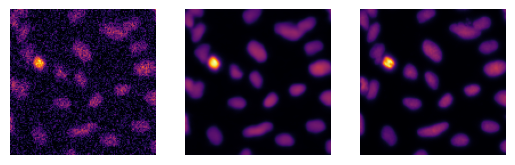

1350 tf.Tensor(0.44719812, shape=(), dtype=float32) tf.Tensor(24.897888, shape=(), dtype=float32)
1400 tf.Tensor(0.39512736, shape=(), dtype=float32) tf.Tensor(27.7062, shape=(), dtype=float32)
Validation best loss: 1400 tf.Tensor(0.337981, shape=(), dtype=float32) tf.Tensor(29.817703, shape=(), dtype=float32)
Objects: 14


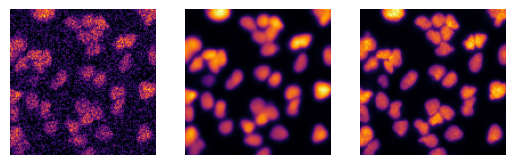

1450 tf.Tensor(0.41720623, shape=(), dtype=float32) tf.Tensor(26.255363, shape=(), dtype=float32)
1500 tf.Tensor(0.36530003, shape=(), dtype=float32) tf.Tensor(26.695053, shape=(), dtype=float32)
Validation best loss: 1500 tf.Tensor(0.31413576, shape=(), dtype=float32) tf.Tensor(30.359856, shape=(), dtype=float32)
Objects: 5


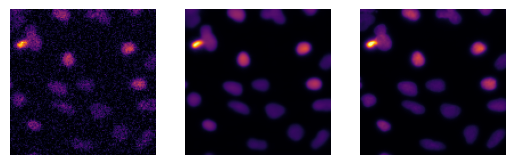

1550 tf.Tensor(0.37534994, shape=(), dtype=float32) tf.Tensor(28.466625, shape=(), dtype=float32)
1600 tf.Tensor(0.3796395, shape=(), dtype=float32) tf.Tensor(26.855711, shape=(), dtype=float32)
Objects: 24


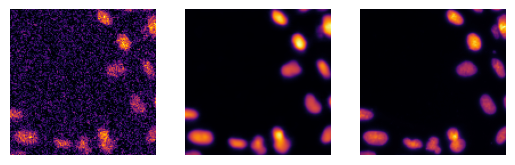

1650 tf.Tensor(0.3550859, shape=(), dtype=float32) tf.Tensor(28.129036, shape=(), dtype=float32)
1700 tf.Tensor(0.40191427, shape=(), dtype=float32) tf.Tensor(28.645464, shape=(), dtype=float32)
Objects: 27


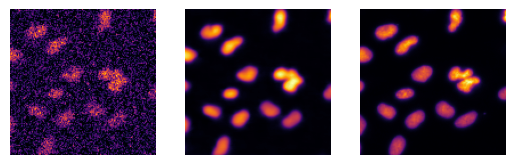

1750 tf.Tensor(0.40893143, shape=(), dtype=float32) tf.Tensor(22.350208, shape=(), dtype=float32)
1800 tf.Tensor(0.37509534, shape=(), dtype=float32) tf.Tensor(29.019667, shape=(), dtype=float32)
Objects: 12


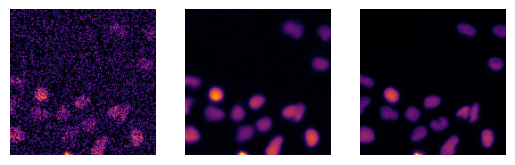

1850 tf.Tensor(0.37176716, shape=(), dtype=float32) tf.Tensor(28.776062, shape=(), dtype=float32)
1900 tf.Tensor(0.40010005, shape=(), dtype=float32) tf.Tensor(27.595114, shape=(), dtype=float32)
Objects: 9


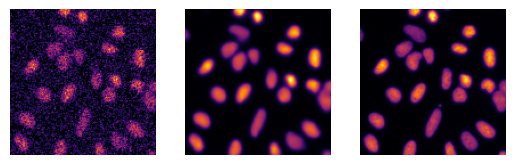

1950 tf.Tensor(0.38298732, shape=(), dtype=float32) tf.Tensor(27.356453, shape=(), dtype=float32)
Elapsed time: 1185.9816892147064


In [9]:
# training
from trainer_DeBCR import train_model as trainer
model_trained = trainer(config, model, multi_input, loss_function_mimo, metrics_func_mimo, train_img_datagen, val_img_datagen, config.training['visual'])

# Visualization

In [10]:
# visualize part prediction results

w_img_val_temp, o_val_temp = val_img_datagen.__next__()
w_val_temp_list, o_val_temp_list = multi_input(w_img_val_temp, o_val_temp)

pred_val_list = model_trained.predict(w_val_temp_list) 

1/1 [==============================] - 3s 3s/step


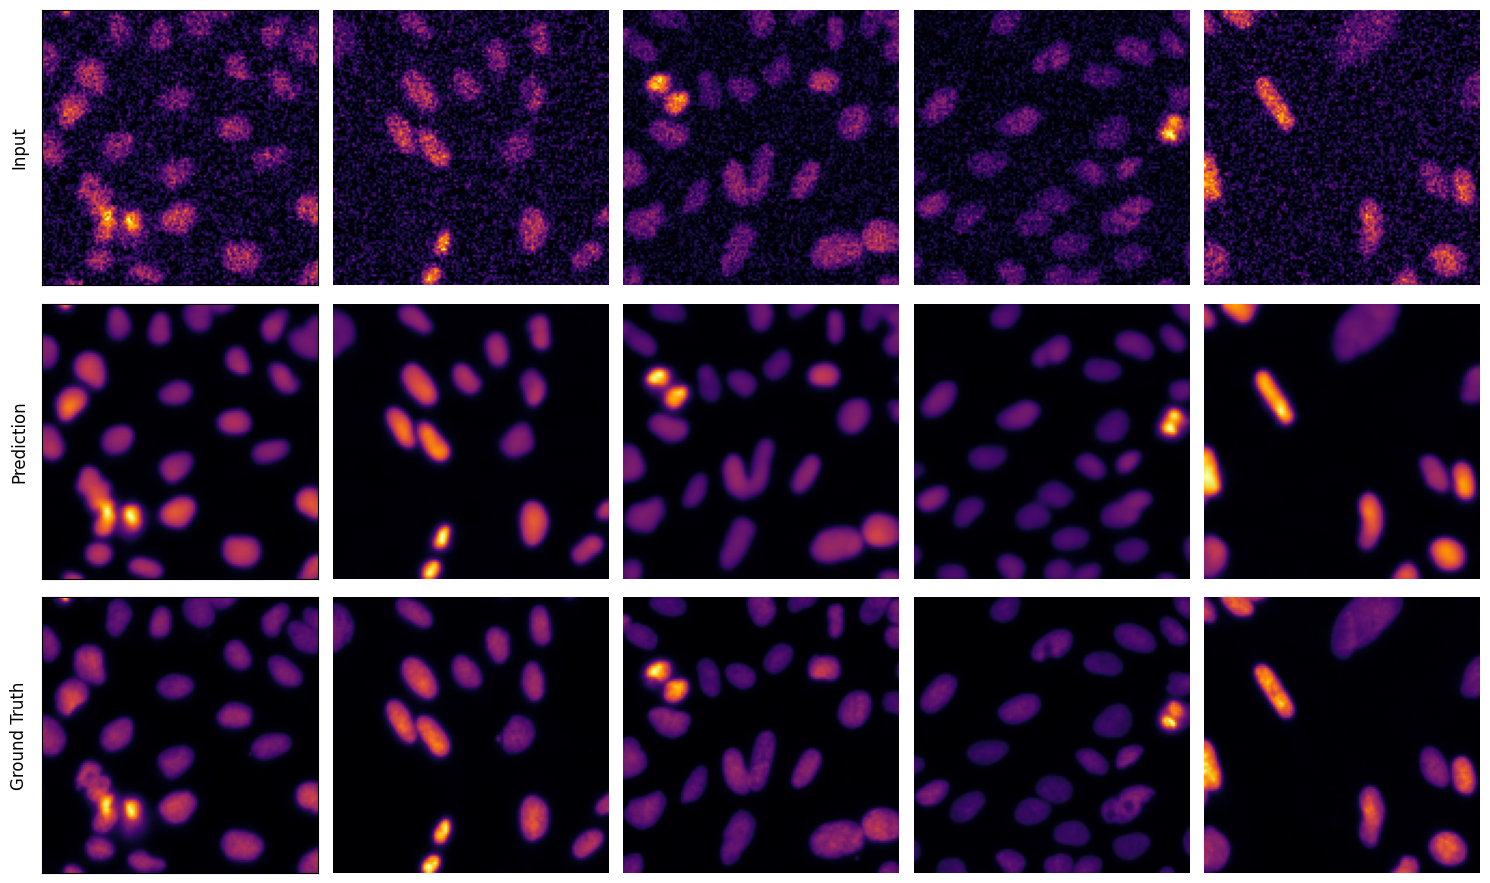

In [11]:
# choose the visualizer
show_grid(pred_val_list[0], w_val_temp_list[0], o_val_temp_list[0])